In [399]:
import pandas as pd

In [400]:
df = pd.read_excel('/kaggle/input/2900-data/2900_data.xlsx')

In [401]:
df

,Product/delivery,Sentiment,Product_Review
0,Delivery,1,১ দিনেই ডেলিভারি পেয়েছি
1,Product,1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...
2,Product,2,সেলার অনেক লেট করে রিপ্লাই দেয়। প্রোডাক্ট শিপম...
3,Product,2,ভালই চলছিল কিন্তু ডেলিভারির ১০ দিন যেতে না যেত...
4,Product,1,এক সপ্তাহের মত ইউজ করলাম। ফুললি স্যাটিস্ফাইড। ...
...,...,...,...
2986,Delivery,0,দারাজের ডেলিভারি ম্যান এত খারাপ আগে জানতাম না ...
2987,Delivery,0,"ডেলিভারি পাইনি পার্সেল 🥸🥸,,শালা দারাজ ডেলিভারি..."
2988,Delivery,0,ডেলিভারি ম্যান এটা ভেঙে ফেলেছে
2989,Delivery,0,"ডেলিভারিম‍্যান বিশ টাকা বেশি নিসে,লোকেশন পর্যন..."


In [402]:
df= df[['Product/delivery','Sentiment','Product_Review']]

In [403]:
df

,Product/delivery,Sentiment,Product_Review
0,Delivery,1,১ দিনেই ডেলিভারি পেয়েছি
1,Product,1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...
2,Product,2,সেলার অনেক লেট করে রিপ্লাই দেয়। প্রোডাক্ট শিপম...
3,Product,2,ভালই চলছিল কিন্তু ডেলিভারির ১০ দিন যেতে না যেত...
4,Product,1,এক সপ্তাহের মত ইউজ করলাম। ফুললি স্যাটিস্ফাইড। ...
...,...,...,...
2986,Delivery,0,দারাজের ডেলিভারি ম্যান এত খারাপ আগে জানতাম না ...
2987,Delivery,0,"ডেলিভারি পাইনি পার্সেল 🥸🥸,,শালা দারাজ ডেলিভারি..."
2988,Delivery,0,ডেলিভারি ম্যান এটা ভেঙে ফেলেছে
2989,Delivery,0,"ডেলিভারিম‍্যান বিশ টাকা বেশি নিসে,লোকেশন পর্যন..."


In [404]:
import re

def remove_bangla_numerics(text):
    #Check if the text is not null or NaN
    if not isinstance(text, str):
        return text
    #Define Bangla numeric pattern
    bangla_numeric_pattern = r'[০১২৩৪৫৬৭৮৯]'
    #Remove Bangla numerics using regex
    text = re.sub(bangla_numeric_pattern, '', text)
    return text

#Ensure the column is of type string
df['Product_Review'] = df['Product_Review'].astype(str)

#Apply the function to the 'stopwordremove' column
df['Cleaned_Review'] = df['Product_Review'].apply(remove_bangla_numerics)
#Function to clean Bangla text
def clean_bangla_text(text):
    #Remove punctuation and numbers
    text = re.sub(r'[^\u0980-\u09FF\s]', ' ', text)  
    # Keep only Bangla characters and spaces

    
    #Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

#Apply cleaning to the 'Product_Review' column
df['Cleaned_Review'] = df['Cleaned_Review'].apply(clean_bangla_text)

#Preview results
print(df[['Product_Review', 'Cleaned_Review']].head())

                                      Product_Review  \
0                            ১ দিনেই ডেলিভারি পেয়েছি   
1  আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...   
2  সেলার অনেক লেট করে রিপ্লাই দেয়। প্রোডাক্ট শিপম...   
3  ভালই চলছিল কিন্তু ডেলিভারির ১০ দিন যেতে না যেত...   
4  এক সপ্তাহের মত ইউজ করলাম। ফুললি স্যাটিস্ফাইড। ...   

                                      Cleaned_Review  
0                              দিনেই ডেলিভারি পেয়েছি  
1  আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...  
2  সেলার অনেক লেট করে রিপ্লাই দেয় প্রোডাক্ট শিপমে...  
3  ভালই চলছিল কিন্তু ডেলিভারির দিন যেতে না যেতেই ...  
4  এক সপ্তাহের মত ইউজ করলাম ফুললি স্যাটিস্ফাইড তে...  


In [405]:
df =  df[['Cleaned_Review','Sentiment']]

# Remove Stopword

In [406]:
bangla_stopwords = [
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 
    'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 
    'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 
    'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 
    'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 
    'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 
    'এস', 'এতে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 
    'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 
    'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 
    'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 
    'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 
    'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও', 'কোনো', 'ক্ষেত্রে', 'কয়েক', 'খুব', 'গিয়ে', 'গিয়েছে', 
    'গিয়ে', 'গুলি', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'চলে', 'চান', 'চায়', 'চার', 'চালু', 'চেয়ে', 
    'চেষ্টা', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন', 'জনকে', 'জনের', 'জন্য', 'জন্যও', 'জে', 
    'জানতে', 'জানা', 'জানানো', 'জানায়', 'জানিয়ে', 'জানিয়েছে', 'জে', 'টি', 'ঠিক', 'তখন', 'তত', 
    'তথা', 'তবু', 'তবে', 'তা', 'তাঁকে', 'তাঁদের', 'তাঁর', 'তাঁরা', 'তাঁাহারা', 'তাই', 'তাও', 'তাকে', 
    'তাতে', 'তাদের', 'তার', 'তারপর', 'তারা', 'তারৈ', 'তাহলে', 'তাহা', 'তাহাতে', 'তাহার', 'তিনঐ', 
    'তিনি', 'তিনিও', 'তুমি', 'তুলে', 'তেমন', 'তো', 'তোমার', 'থাকবে', 'থাকবেন', 'থাকা', 'থাকায়', 
    'থাকে', 'থাকেন', 'থেকে', 'থেকেই', 'থেকেও', 'দিকে', 'দিতে', 'দিন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 
    'দিলেন', 'দু', 'দুই', 'দুটি', 'দুটো', 'দেওয়া', 'দেওয়ার', 'দেওয়া', 'দেখতে', 'দেখা', 'দেখে', 
    'দেন', 'দেয়', 'দ্বারা', 'ধরা', 'ধরে', 'ধামার', 'নতুন', 'নয়', 'না', 'নাই', 'নাকি', 'নাগাদ', 
    'নানা', 'নিজে', 'নিজেই', 'নিজেদের', 'নিজের', 'নিতে', 'নিয়ে', 'নিয়ে', 'নেই', 'নেওয়া', 'নেওয়ার', 
    'নেওয়া', 'নয়', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পরেও', 'পর্যন্ত', 'পাওয়া', 'পাচ', 'পারি', 
    'পারে', 'পারেন', 'পি', 'পেয়ে', 'পেয়্র্', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 
    'প্রায়', 'ফলে', 'ফিরে', 'ফের', 'বক্তব্য', 'বদলে', 'বন', 'বরং', 'বলতে', 'বলল', 'বললেন', 'বলা', 
    'বলে', 'বলেছেন', 'বলেন', 'বসে', 'বহু', 'বা', 'বাদে', 'বার', 'বি', 'বিনা', 'বিভিন্ন', 'বিশেষ', 
    'বিষয়টি', 'বেশ', 'বেশি', 'ব্যবহার', 'ব্যাপারে', 'ভাবে', 'ভাবেই', 'মতো', 'মতোই', 'মধ্যে', 
    'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মনে', 'মাত্র', 'মাধ্যমে', 'মোট', 'মোটেই', 'যখন', 'যত', 
    'যতটা', 'যথেষ্ট', 'যদি', 'যদিও', 'যা', 'যাঁর', 'যাঁরা', 'যাওয়া', 'যাওয়ার', 'যাওয়া', 
    'যাকে', 'যাচ্ছে', 'যাতে', 'যাদের', 'যান', 'যাবে', 'যায়', 'যার', 'যারা', 'যিনি', 'যে', 
    'যেখানে', 'যেতে', 'যেন', 'যেমন', 'র', 'রকম', 'রয়েছে', 'রাখা', 'রেখে', 'লক্ষ', 'শুধু', 
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সব', 'সবার', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সামনে', 
    'সি', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে', 'সেটা', 'সেটাই', 'সেটাও', 'সেটি', 'স্পষ্ট', 
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ায়', 'হওয়ার', 'হচ্ছে', 'হত', 'হতে', 
    'হতেই', 'হন', 'হবে', 'হবেন', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 
    'হয়েছেন', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হাজার', 'হিসাবে', 'হৈলে', 'হোক', 'হয়'
]

#Function for removing stopwords from cleaned text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in bangla_stopwords]
    return ' '.join(filtered_words)

#Applying stopword removal to the 'cleaned' column
df['Cleaned_Review'] = df['Cleaned_Review'].apply(remove_stopwords)


/tmp/ipykernel_30/3423725429.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Review'] = df['Cleaned_Review'].apply(remove_stopwords)


In [407]:
df

,Cleaned_Review,Sentiment
0,দিনেই ডেলিভারি পেয়েছি,1
1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...,1
2,সেলার লেট রিপ্লাই দেয় প্রোডাক্ট শিপমেন্টে দেয়া...,2
3,ভালই চলছিল ডেলিভারির যেতেই ফোন চালাতে চালাতে হ...,2
4,এক সপ্তাহের মত ইউজ করলাম ফুললি স্যাটিস্ফাইড তে...,1
...,...,...
2986,দারাজের ডেলিভারি ম্যান খারাপ জানতাম অর্ডারকৃত ...,0
2987,ডেলিভারি পাইনি পার্সেল শালা দারাজ ডেলিভারি টিম...,0
2988,ডেলিভারি ম্যান ভেঙে ফেলেছে,0
2989,ডেলিভারিম ্যান বিশ টাকা নিসে লোকেশন আসতে চায়না...,0


In [408]:
df['Sentiment'].value_counts()

Sentiment
1     1479
0     1387
2      124
1`       1
Name: count, dtype: int64

In [409]:
df = df[df['Sentiment'] !=2]

In [410]:
df['Sentiment'] = df['Sentiment'].replace('1`', 1)

/tmp/ipykernel_30/2807654424.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment'] = df['Sentiment'].replace('1`', 1)
/tmp/ipykernel_30/2807654424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment'] = df['Sentiment'].replace('1`', 1)


In [411]:
df['Sentiment'].value_counts()

Sentiment
1    1480
0    1387
Name: count, dtype: int64

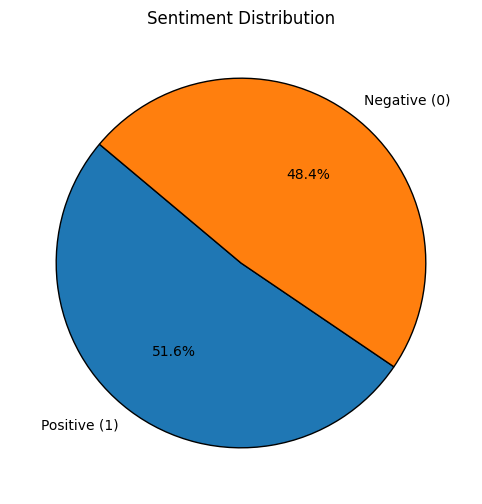

In [412]:
import matplotlib.pyplot as plt

#Sentiment_value counts
sentiment_counts = {'1': 1480, '0': 1387}

#Plot the piechart of 'Sentiment'
plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts.values(),
    labels=['Positive (1)', 'Negative (0)'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Sentiment Distribution')
plt.show()


In [413]:
df.shape

(2867, 2)

In [414]:
from sklearn.preprocessing import LabelEncoder
#Encode labels
label_encoder = LabelEncoder()
df['Encoded_Category'] = label_encoder.fit_transform(df['Sentiment'])

/tmp/ipykernel_30/2040772658.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Encoded_Category'] = label_encoder.fit_transform(df['Sentiment'])


In [415]:
df

,Cleaned_Review,Sentiment,Encoded_Category
0,দিনেই ডেলিভারি পেয়েছি,1,1
1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...,1,1
4,এক সপ্তাহের মত ইউজ করলাম ফুললি স্যাটিস্ফাইড তে...,1,1
5,সাথে ইয়ারফোন স্ক্রিন প্রটেক্টর ব্যাক কভার ভাল...,1,1
6,দাম পড়ছে টাকা দামে সেরা ফোন নরমাল ইউজার রা সেক...,1,1
...,...,...,...
2986,দারাজের ডেলিভারি ম্যান খারাপ জানতাম অর্ডারকৃত ...,0,0
2987,ডেলিভারি পাইনি পার্সেল শালা দারাজ ডেলিভারি টিম...,0,0
2988,ডেলিভারি ম্যান ভেঙে ফেলেছে,0,0
2989,ডেলিভারিম ্যান বিশ টাকা নিসে লোকেশন আসতে চায়না...,0,0


In [416]:
import pandas as pd

#Group by 'Category' & take sample 100 rows for test set
test_df = df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))

#Use the remaining rows for the training set
train_df = df.drop(test_df.index)

#Verify the split in next 2 lines
print("Test set distribution:\n", test_df['Sentiment'].value_counts())
print("\nTrain set distribution:\n", train_df['Sentiment'].value_counts())

Test set distribution:
 Sentiment
0    100
1    100
Name: count, dtype: int64

Train set distribution:
 Sentiment
1    1380
0    1287
Name: count, dtype: int64


/tmp/ipykernel_30/2784580993.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = df.groupby('Sentiment', group_keys=False).apply(lambda x: x.sample(n=min(len(x), 100), random_state=42))


In [417]:
test_df

,Cleaned_Review,Sentiment,Encoded_Category
994,একটা নেগেটিভ দিক ভীষণ খুঁতখুঁতে অডিও ভিডিও সুব...,0,0
552,এইজন্যই দারাজ খুবই মেজাজ খারাপ জোড়া গ্লাভস অর্...,0,0
1723,প্যাকেজিং বাজে হয়েছে আনবক্স নি এমনে খুলে অন্যা...,0,0
1023,জামা পাজামার কাপড়টা পলেস্টার এক কথায় অসাধারণ র...,0,0
1285,প্রোডাক্ট ডেলিভারি দেখি ড্যামেজড,0,0
...,...,...,...
58,প্রোডাক্ট মান খুবই উন্নত প্রচুর গরম লাগবে গত ড...,1,1
80,আলহামদুলিল্লাহ দুইটা অর্ডার করেছিলাম একটা করেছ...,1,1
30,ভালো পন্য সাউন্ড কোয়ালিটি খুবই ভালো মার্কেটে প...,1,1
2263,মাএ হাতে পেয়েই রিভিউ দিলাম এক্কেবারে পছন্দসই হ...,1,1


In [418]:
# Combine all text in the column into a single string
all_text = " ".join(df['Cleaned_Review'].dropna())  
# This  Remove NaN values if any

# Split the text into individual words
all_words = all_text.split()


unique_words = set(all_words)

num_unique_words = len(unique_words)

print(f"Number of unique words: {num_unique_words}")
print(f"Sample unique words: {list(unique_words)[:20]}")  
# It Display the first 20 unique words

Number of unique words: 7639
Sample unique words: ['পেশাদার', 'নানান', 'লাব', 'মধু', 'অ্যাভেলেবল', 'প্যান্টটি', 'কারেন্টের', 'নিচেই', 'চলেনি', 'বোনকে', 'নব', 'অন্যগুলার', 'ফোনের', 'জরুরি', 'হাতা', 'দুইদিন', 'করেছিল', 'অভার', 'ফুলে', 'প্রোফাইল']


In [419]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [420]:
df

,Cleaned_Review,Sentiment,Encoded_Category
0,দিনেই ডেলিভারি পেয়েছি,1,1
1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...,1,1
4,এক সপ্তাহের মত ইউজ করলাম ফুললি স্যাটিস্ফাইড তে...,1,1
5,সাথে ইয়ারফোন স্ক্রিন প্রটেক্টর ব্যাক কভার ভাল...,1,1
6,দাম পড়ছে টাকা দামে সেরা ফোন নরমাল ইউজার রা সেক...,1,1
...,...,...,...
2986,দারাজের ডেলিভারি ম্যান খারাপ জানতাম অর্ডারকৃত ...,0,0
2987,ডেলিভারি পাইনি পার্সেল শালা দারাজ ডেলিভারি টিম...,0,0
2988,ডেলিভারি ম্যান ভেঙে ফেলেছে,0,0
2989,ডেলিভারিম ্যান বিশ টাকা নিসে লোকেশন আসতে চায়না...,0,0


In [421]:
#Group the data by 'Product_Delivery' & sample 100 rows from each group
test_df = df.groupby('Sentiment').sample(n=100, random_state=42)

#remaining rows for train
train_df = df.drop(test_df.index)

#Verify my distribution
print("Test set distribution:")
print(test_df['Sentiment'].value_counts())
print("\nTrain set distribution:")
print(train_df['Sentiment'].value_counts())

Test set distribution:
Sentiment
0    100
1    100
Name: count, dtype: int64

Train set distribution:
Sentiment
1    1380
0    1287
Name: count, dtype: int64


In [422]:
df

,Cleaned_Review,Sentiment,Encoded_Category
0,দিনেই ডেলিভারি পেয়েছি,1,1
1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...,1,1
4,এক সপ্তাহের মত ইউজ করলাম ফুললি স্যাটিস্ফাইড তে...,1,1
5,সাথে ইয়ারফোন স্ক্রিন প্রটেক্টর ব্যাক কভার ভাল...,1,1
6,দাম পড়ছে টাকা দামে সেরা ফোন নরমাল ইউজার রা সেক...,1,1
...,...,...,...
2986,দারাজের ডেলিভারি ম্যান খারাপ জানতাম অর্ডারকৃত ...,0,0
2987,ডেলিভারি পাইনি পার্সেল শালা দারাজ ডেলিভারি টিম...,0,0
2988,ডেলিভারি ম্যান ভেঙে ফেলেছে,0,0
2989,ডেলিভারিম ্যান বিশ টাকা নিসে লোকেশন আসতে চায়না...,0,0


# CNN Model

In [423]:

#Tokenize and pad sequences
vocab_size = 12000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Cleaned_Review'])

train_sequences = tokenizer.texts_to_sequences(train_df['Cleaned_Review'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')

test_sequences = tokenizer.texts_to_sequences(test_df['Cleaned_Review'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

#Convert labels to categorical
train_labels = to_categorical(train_df['Encoded_Category'])
test_labels = to_categorical(test_df['Encoded_Category'])


In [424]:
train_labels

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [425]:
test_padded

array([[   7, 1133,  576, ...,    0,    0,    0],
       [2603,    9,   11, ...,    0,    0,    0],
       [  27,   12,   37, ...,    0,    0,    0],
       ...,
       [2053,    2, 3009, ...,    0,    0,    0],
       [ 168,  161,   74, ...,    0,    0,    0],
       [  33,  213,    8, ...,    0,    0,    0]], dtype=int32)

In [426]:
#test_sequences

In [427]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


#Define CNN Model Below
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  # Embedding layer
    Conv1D(filters=128, kernel_size=5, activation='relu'),  # Convolutional layer
    GlobalMaxPooling1D(),  # Global Max Pooling
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(train_labels.shape[1], activation='softmax')  # Output layer
])

#Compile model below
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Print model summary
model.summary()

#Train  CNN Model
history = model.fit(
    train_padded, 
    train_labels, 
    validation_data=(test_padded, test_labels), 
    epochs=5,  # You can increase the number of epochs
    batch_size=32,  # Adjust batch size based on available resources
    verbose=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_32 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_32 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_32         │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.5488 - loss: 0.6807 - val_accuracy: 0.8350 - val_loss: 0.4671
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8604 - loss: 0.3855 - val_accuracy: 0.8900 - val_loss: 0.3443
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9539 - loss: 0.1454 - val_accuracy: 0.8950 - val_loss: 0.3465
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9870 - loss: 0.0499 - val_accuracy: 0.8950 - val_loss: 0.4323
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9970 - loss: 0.0164 - val_accuracy: 0.9050 - val_loss: 0.4991


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9357 - loss: 0.3171 
Test Accuracy: 0.90
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


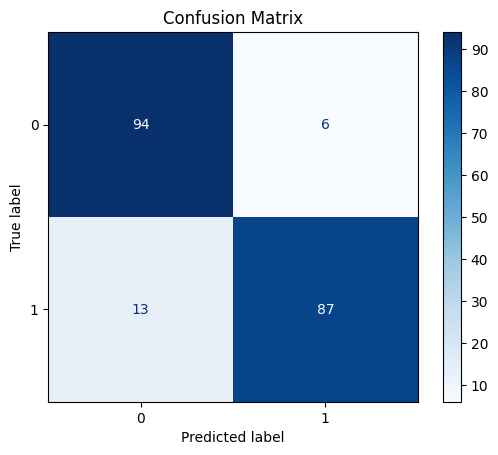

In [428]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

#Predict on the test set
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

#Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

#Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [429]:
from sklearn.metrics import classification_report

num_classes = train_labels.shape[1]
class_names = [str(i) for i in range(num_classes)] 

#Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       100
           1       0.94      0.87      0.90       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.90       200
weighted avg       0.91      0.91      0.90       200



In [430]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

#\Example category mapping for binary sentiment classification (0 = Negative, 1 = Positive)
category_mapping = {0: "Negative", 1: "Positive"}

#Function to preprocess and predict sentiment
def predict_sentiment(sentence, model, tokenizer, max_length):
    #Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    
    #Predict the sentiment
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction, axis=1)[0]
    
    #Map the predicted label to sentiment
    sentiment = category_mapping[predicted_label]
    return sentiment

# Example
sentences = [
    "এটা একদম দুর্দান্ত পণ্য, আমি খুব খুশি!",  # Positive
    "এই সেবা একদম খারাপ ছিল, আমি হতাশ!",  # Negative
    "অসাধারণ কাজ, সবকিছু খুব ভালোভাবে কাজ করেছে।",  # Positive
    "ভালো পণ্য কিন্তু ডেলিভারি সিস্টেমটি খুব খারাপ।",  # Negative
    "সুন্দর অভিজ্ঞতা ছিল, পণ্যটি খুব ভালো!",  # Positive
]

#Predict sentiment
for sentence in sentences:
    sentiment = predict_sentiment(sentence, model, tokenizer, max_length)
    print(f"Sentence: '{sentence}'\nPredicted Sentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Sentence: 'এটা একদম দুর্দান্ত পণ্য, আমি খুব খুশি!'
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Sentence: 'এই সেবা একদম খারাপ ছিল, আমি হতাশ!'
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'অসাধারণ কাজ, সবকিছু খুব ভালোভাবে কাজ করেছে।'
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'ভালো পণ্য কিন্তু ডেলিভারি সিস্টেমটি খুব খারাপ।'
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'সুন্দর অভিজ্ঞতা ছিল, পণ্যটি খুব ভালো!'
Predicted Sentiment: Positive



# RCNN (Recurrent Convolution Neural Network)

In [431]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, LSTM, concatenate, Input
from tensorflow.keras.models import Model

#RCNN Model
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, 128, input_length=max_length)(input_layer)

#Convolutional Features
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(embedding_layer)
conv_pool = GlobalMaxPooling1D()(conv_layer)

#Recurrent Features
lstm_layer = LSTM(128, return_sequences=False)(embedding_layer)

#Combine Features
concat = concatenate([conv_pool, lstm_layer])
dropout = Dropout(0.5)(concat)
output = Dense(train_labels.shape[1], activation='softmax')(dropout)

#Compile Model
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train Model
model.fit(train_padded, train_labels, validation_data=(test_padded, test_labels), epochs=5, batch_size=64)

#Evaluate
test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5818 - loss: 0.6732 - val_accuracy: 0.8150 - val_loss: 0.5319
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8677 - loss: 0.4283 - val_accuracy: 0.9050 - val_loss: 0.3507
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9367 - loss: 0.2057 - val_accuracy: 0.8900 - val_loss: 0.3076
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9660 - loss: 0.1100 - val_accuracy: 0.9050 - val_loss: 0.3162
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9877 - loss: 0.0534 - val_accuracy: 0.9000 - val_loss: 0.3289
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9187 - loss: 0.2480 
Test Accuracy: 0.90


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


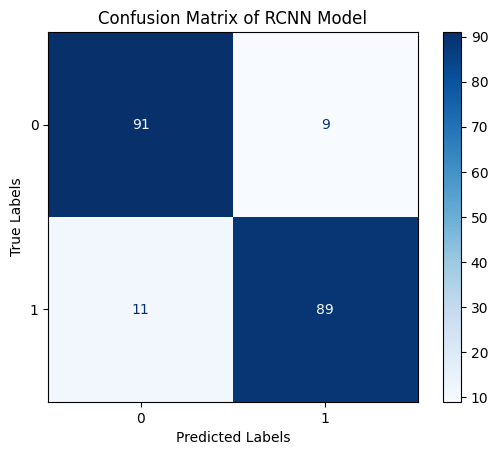

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.91      0.90       100
    Positive       0.91      0.89      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [432]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#Predict on the test set
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)  
# Convert probabilities to class labels


true_labels = np.argmax(test_labels, axis=1)  
# Convert one-hot encoded labels to class labels

#Generate Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

#Plotting Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of RCNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Generate Classification Report
report = classification_report(true_labels, predicted_labels, target_names=["Negative", "Positive"])
print("Classification Report:")
print(report)

In [433]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example category mapping for binary sentiment classification
category_mapping = {0: "Negative", 1: "Positive"}

# Function to preprocess and predict sentiment
def predict_sentiment(sentence, model, tokenizer, max_length):
    #Tokenize and pad the input sentence
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    
    #Predict the sentiment
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction, axis=1)[0]
    
    #Map the predicted label to sentiment
    sentiment = category_mapping[predicted_label]
    return sentiment

# Example 
sentences = [
    "এটা একদম দুর্দান্ত পণ্য, আমি খুব খুশি!",  # Positive
    "এই সেবা একদম খারাপ ছিল, আমি হতাশ!",  # Negative
    "অসাধারণ কাজ, সবকিছু খুব ভালোভাবে কাজ করেছে।",  # Positive
    "ভালো পণ্য কিন্তু ডেলিভারি সিস্টেমটি খুব খারাপ।",  # Negative
    "সুন্দর অভিজ্ঞতা ছিল, পণ্যটি খুব ভালো!",  # Positive
]

# Predict sentiment
for sentence in sentences:
    sentiment = predict_sentiment(sentence, model, tokenizer, max_length)
    print(f"Sentence: '{sentence}'\nPredicted Sentiment: {sentiment}\n")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sentence: 'এটা একদম দুর্দান্ত পণ্য, আমি খুব খুশি!'
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'এই সেবা একদম খারাপ ছিল, আমি হতাশ!'
Predicted Sentiment: Negative

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'অসাধারণ কাজ, সবকিছু খুব ভালোভাবে কাজ করেছে।'
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: 'ভালো পণ্য কিন্তু ডেলিভারি সিস্টেমটি খুব খারাপ।'
Predicted Sentiment: Positive

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sentence: 'সুন্দর অভিজ্ঞতা ছিল, পণ্যটি খুব ভালো!'
Predicted Sentiment: Positive



# Classification

In [434]:
df = pd.read_excel('/kaggle/input/2900-data/2900_data.xlsx')
df = df[['Product/delivery','Product_Review']]
import re

def remove_bangla_numerics(text):
    if not isinstance(text, str):
        return text
    bangla_numeric_pattern = r'[০১২৩৪৫৬৭৮৯]'
    text = re.sub(bangla_numeric_pattern, '', text)
    return text

#Ensure the column is of type string
df['Product_Review'] = df['Product_Review'].astype(str)

#Apply the function to the 'stopwordremove' column
df['Cleaned_Review'] = df['Product_Review'].apply(remove_bangla_numerics)
df =  df[['Cleaned_Review','Product/delivery']]



#Clean Bangla text
def clean_bangla_text(text):
    # Remove punctuation and numbers
    text = re.sub(r'[^\u0980-\u09FF\s]', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to the 'Product_Review' column
df['Cleaned_Review'] = df['Cleaned_Review'].apply(clean_bangla_text)
#df = df[df['Product/delivery'] != "Delivary"]

In [435]:
bangla_stopwords = [
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 
    'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 
    'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 
    'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 
    'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 
    'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 
    'এস', 'এতে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 
    'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 
    'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 
    'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 
    'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 
    'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও', 'কোনো', 'ক্ষেত্রে', 'কয়েক', 'খুব', 'গিয়ে', 'গিয়েছে', 
    'গিয়ে', 'গুলি', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'চলে', 'চান', 'চায়', 'চার', 'চালু', 'চেয়ে', 
    'চেষ্টা', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন', 'জনকে', 'জনের', 'জন্য', 'জন্যও', 'জে', 
    'জানতে', 'জানা', 'জানানো', 'জানায়', 'জানিয়ে', 'জানিয়েছে', 'জে', 'টি', 'ঠিক', 'তখন', 'তত', 
    'তথা', 'তবু', 'তবে', 'তা', 'তাঁকে', 'তাঁদের', 'তাঁর', 'তাঁরা', 'তাঁাহারা', 'তাই', 'তাও', 'তাকে', 
    'তাতে', 'তাদের', 'তার', 'তারপর', 'তারা', 'তারৈ', 'তাহলে', 'তাহা', 'তাহাতে', 'তাহার', 'তিনঐ', 
    'তিনি', 'তিনিও', 'তুমি', 'তুলে', 'তেমন', 'তো', 'তোমার', 'থাকবে', 'থাকবেন', 'থাকা', 'থাকায়', 
    'থাকে', 'থাকেন', 'থেকে', 'থেকেই', 'থেকেও', 'দিকে', 'দিতে', 'দিন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন', 
    'দিলেন', 'দু', 'দুই', 'দুটি', 'দুটো', 'দেওয়া', 'দেওয়ার', 'দেওয়া', 'দেখতে', 'দেখা', 'দেখে', 
    'দেন', 'দেয়', 'দ্বারা', 'ধরা', 'ধরে', 'ধামার', 'নতুন', 'নয়', 'না', 'নাই', 'নাকি', 'নাগাদ', 
    'নানা', 'নিজে', 'নিজেই', 'নিজেদের', 'নিজের', 'নিতে', 'নিয়ে', 'নিয়ে', 'নেই', 'নেওয়া', 'নেওয়ার', 
    'নেওয়া', 'নয়', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পরেও', 'পর্যন্ত', 'পাওয়া', 'পাচ', 'পারি', 
    'পারে', 'পারেন', 'পি', 'পেয়ে', 'পেয়্র্', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়', 
    'প্রায়', 'ফলে', 'ফিরে', 'ফের', 'বক্তব্য', 'বদলে', 'বন', 'বরং', 'বলতে', 'বলল', 'বললেন', 'বলা', 
    'বলে', 'বলেছেন', 'বলেন', 'বসে', 'বহু', 'বা', 'বাদে', 'বার', 'বি', 'বিনা', 'বিভিন্ন', 'বিশেষ', 
    'বিষয়টি', 'বেশ', 'বেশি', 'ব্যবহার', 'ব্যাপারে', 'ভাবে', 'ভাবেই', 'মতো', 'মতোই', 'মধ্যে', 
    'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মনে', 'মাত্র', 'মাধ্যমে', 'মোট', 'মোটেই', 'যখন', 'যত', 
    'যতটা', 'যথেষ্ট', 'যদি', 'যদিও', 'যা', 'যাঁর', 'যাঁরা', 'যাওয়া', 'যাওয়ার', 'যাওয়া', 
    'যাকে', 'যাচ্ছে', 'যাতে', 'যাদের', 'যান', 'যাবে', 'যায়', 'যার', 'যারা', 'যিনি', 'যে', 
    'যেখানে', 'যেতে', 'যেন', 'যেমন', 'র', 'রকম', 'রয়েছে', 'রাখা', 'রেখে', 'লক্ষ', 'শুধু', 
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সব', 'সবার', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সামনে', 
    'সি', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে', 'সেটা', 'সেটাই', 'সেটাও', 'সেটি', 'স্পষ্ট', 
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ায়', 'হওয়ার', 'হচ্ছে', 'হত', 'হতে', 
    'হতেই', 'হন', 'হবে', 'হবেন', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে', 
    'হয়েছেন', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হাজার', 'হিসাবে', 'হৈলে', 'হোক', 'হয়'
]

#remove stopwords from cleaned text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in bangla_stopwords]
    return ' '.join(filtered_words)

#stopword removal to the 'cleaned' column
df['Cleaned_Review'] = df['Cleaned_Review'].apply(remove_stopwords)


In [436]:
df=df[df['Product/delivery']!="Delivary"]

In [437]:
df['Product/delivery'].value_counts()

Product/delivery
Product     2100
Delivery     891
Name: count, dtype: int64

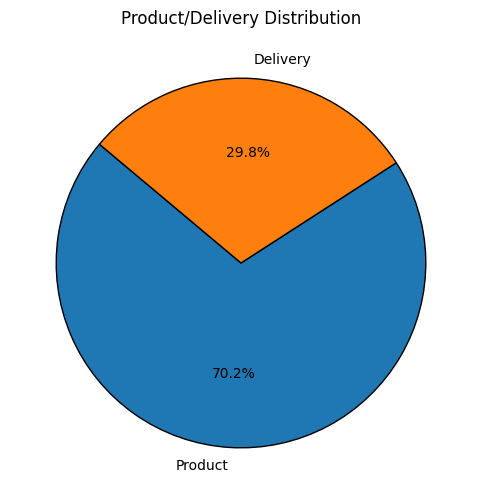

In [438]:
import matplotlib.pyplot as plt

#Data from the value counts
data = {'Product': 2100, 'Delivery': 890}

#Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    data.values(),
    labels=data.keys(),
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Product/Delivery Distribution')
plt.show()


In [439]:
df

,Cleaned_Review,Product/delivery
0,দিনেই ডেলিভারি পেয়েছি,Delivery
1,আসসালামু আলাইকুম ওয়া রাহমাতুল্লাহ আলহামদুলিল্...,Product
2,সেলার লেট রিপ্লাই দেয় প্রোডাক্ট শিপমেন্টে দেয়া...,Product
3,ভালই চলছিল ডেলিভারির যেতেই ফোন চালাতে চালাতে হ...,Product
4,এক সপ্তাহের মত ইউজ করলাম ফুললি স্যাটিস্ফাইড তে...,Product
...,...,...
2986,দারাজের ডেলিভারি ম্যান খারাপ জানতাম অর্ডারকৃত ...,Delivery
2987,ডেলিভারি পাইনি পার্সেল শালা দারাজ ডেলিভারি টিম...,Delivery
2988,ডেলিভারি ম্যান ভেঙে ফেলেছে,Delivery
2989,ডেলিভারিম ্যান বিশ টাকা নিসে লোকেশন আসতে চায়না...,Delivery


In [440]:
from sklearn.preprocessing import LabelEncoder
# Encode labels
label_encoder = LabelEncoder()
df['Encoded_Category'] = label_encoder.fit_transform(df['Product/delivery'])

# CNN Classification

In [441]:
# Group the data by 'Product_Delivery' and sample 100 rows from each group for the test set
test_df = df.groupby('Product/delivery').sample(n=100, random_state=42)

# Get the remaining rows for the train set
train_df = df.drop(test_df.index)

# Verify the distribution
print("Test set distribution:")
print(test_df['Product/delivery'].value_counts())
print("\nTrain set distribution:")
print(train_df['Product/delivery'].value_counts())
# Tokenize and pad sequences
vocab_size = 12000
max_length = 100
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Cleaned_Review'])

train_sequences = tokenizer.texts_to_sequences(train_df['Cleaned_Review'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')

test_sequences = tokenizer.texts_to_sequences(test_df['Cleaned_Review'])
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_df['Encoded_Category'])
test_labels = to_categorical(test_df['Encoded_Category'])


Test set distribution:
Product/delivery
Delivery    100
Product     100
Name: count, dtype: int64

Train set distribution:
Product/delivery
Product     2000
Delivery     791
Name: count, dtype: int64


In [442]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Define CNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),  # Embedding layer
    Conv1D(filters=128, kernel_size=5, activation='relu'),  # Convolutional layer
    GlobalMaxPooling1D(),  # Global Max Pooling
    Dropout(0.5),  # Dropout for regularization
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(train_labels.shape[1], activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the CNN Model
history = model.fit(
    train_padded, 
    train_labels, 
    validation_data=(test_padded, test_labels), 
    epochs=5, 
    batch_size=64,
    verbose=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_34         │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.6109 - loss: 0.6376 - val_accuracy: 0.5000 - val_loss: 0.6636
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7742 - loss: 0.4511 - val_accuracy: 0.8550 - val_loss: 0.4215
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9279 - loss: 0.1963 - val_accuracy: 0.8750 - val_loss: 0.3630
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9753 - loss: 0.1020 - val_accuracy: 0.8700 - val_loss: 0.4213
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0525 - val_accuracy: 0.8700 - val_loss: 0.4233


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8443 - loss: 0.5280  
Test Accuracy: 0.87
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


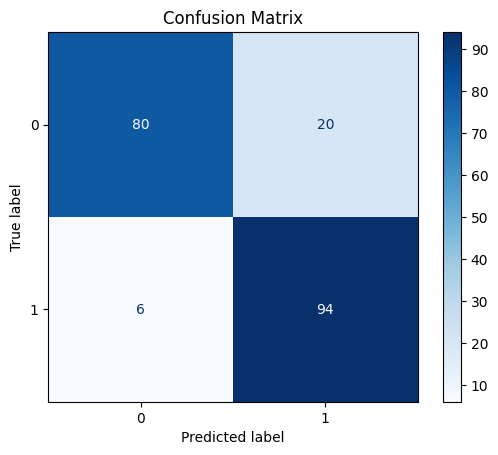

In [443]:
#Evaluate the model on the test se
test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}")

#Predict on the test set
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

#Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

#Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [444]:
from sklearn.metrics import classification_report

num_classes = train_labels.shape[1]
class_names = [str(i) for i in range(num_classes)] 

#Generate classification report
report = classification_report(true_labels, predicted_labels, target_names=class_names)
print(report)


              precision    recall  f1-score   support

           0       0.93      0.80      0.86       100
           1       0.82      0.94      0.88       100

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [445]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

random_sentences_bangla = [
    "পণ্যের মান খুবই ভালো।",  # Product
    "ডেলিভারিতে অনেক দেরি হয়েছে।",  # Delivery
    "এই পণ্যটি ব্যবহার করতে আমার খুব ভালো লাগছে।",  # Product
    "কুরিয়ার ঠিকানায় পৌঁছে দিতে পারেনি।",  # Delivery
    "পণ্যের দাম মানের তুলনায় অনেক বেশি।"  # Product
]


random_sequences_bangla = tokenizer.texts_to_sequences(random_sentences_bangla)
random_padded_bangla = pad_sequences(random_sequences_bangla, maxlen=max_length, padding='post')

# Predict on the random Bangla sentences
random_predictions_bangla = model.predict(random_padded_bangla)
predicted_classes_bangla = np.argmax(random_predictions_bangla, axis=1)

# Map predictions to labels
label_mapping = {0: "Delivery", 1: "Product"}
predicted_labels_bangla = [label_mapping[class_id] for class_id in predicted_classes_bangla]

# Display predictions
for sentence, label in zip(random_sentences_bangla, predicted_labels_bangla):
    print(f"Sentence: \"{sentence}\" -> Predicted Label: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Sentence: "পণ্যের মান খুবই ভালো।" -> Predicted Label: Product
Sentence: "ডেলিভারিতে অনেক দেরি হয়েছে।" -> Predicted Label: Delivery
Sentence: "এই পণ্যটি ব্যবহার করতে আমার খুব ভালো লাগছে।" -> Predicted Label: Product
Sentence: "কুরিয়ার ঠিকানায় পৌঁছে দিতে পারেনি।" -> Predicted Label: Delivery
Sentence: "পণ্যের দাম মানের তুলনায় অনেক বেশি।" -> Predicted Label: Product


# RCNN Model

In [446]:
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, LSTM, concatenate, Input
from tensorflow.keras.models import Model

# RCNN Model
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(vocab_size, 128, input_length=max_length)(input_layer)

# Convolutional Features
conv_layer = Conv1D(filters=128, kernel_size=3, activation='relu', padding='same')(embedding_layer)
conv_pool = GlobalMaxPooling1D()(conv_layer)

# Recurrent Features
lstm_layer = LSTM(128, return_sequences=False)(embedding_layer)

# Combine Features
concat = concatenate([conv_pool, lstm_layer])
dropout = Dropout(0.5)(concat)
output = Dense(train_labels.shape[1], activation='softmax')(dropout)

# Compile Model
model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
model.fit(train_padded, train_labels, validation_data=(test_padded, test_labels), epochs=5, batch_size=64)

# Evaluate
test_loss, test_accuracy = model.evaluate(test_padded, test_labels, verbose=1)
print(f"Test Accuracy: {test_accuracy:.2f}") 

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6523 - loss: 0.5992 - val_accuracy: 0.6750 - val_loss: 0.5251
Epoch 2/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8494 - loss: 0.3304 - val_accuracy: 0.8400 - val_loss: 0.3678
Epoch 3/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9371 - loss: 0.1625 - val_accuracy: 0.8800 - val_loss: 0.3013
Epoch 4/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9714 - loss: 0.0913 - val_accuracy: 0.8850 - val_loss: 0.3282
Epoch 5/5
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9898 - loss: 0.0453 - val_accuracy: 0.8700 - val_loss: 0.3343
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8387 - loss: 0.4353 
Test Accuracy: 0.87


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


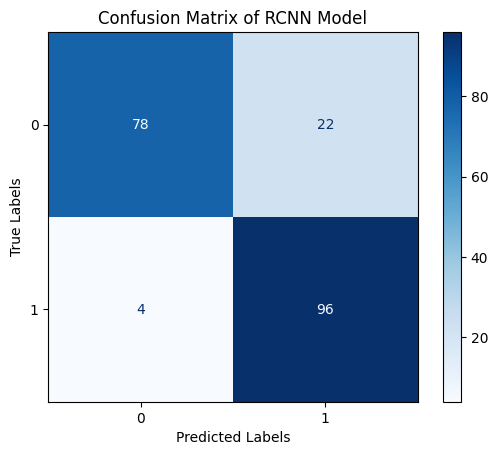

Classification Report:
              precision    recall  f1-score   support

     Product       0.95      0.78      0.86       100
    Delivery       0.81      0.96      0.88       100

    accuracy                           0.87       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.87      0.87       200



In [447]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

#Predict on the test set
predictions = model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)  
# Convert probabilities to class labels


true_labels = np.argmax(test_labels, axis=1)  
# Convert one-hot encoded labels to class labels

#Generating Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(true_labels))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix of RCNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Generate Classification Report
report = classification_report(true_labels, predicted_labels, target_names=["Product", "Delivery"])
print("Classification Report:")
print(report)


In [448]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


random_sentences_bangla = [
    "পণ্যের মান খুবই ভালো।",  # Product
    "ডেলিভারিতে অনেক দেরি হয়েছে।",  # Delivery
    "এই পণ্যটি ব্যবহার করতে আমার খুব ভালো লাগছে।",  # Product
    "কুরিয়ার ঠিকানায় পৌঁছে দিতে পারেনি।",  # Delivery
    "পণ্যের দাম মানের তুলনায় অনেক বেশি।"  # Product
]

random_sequences_bangla = tokenizer.texts_to_sequences(random_sentences_bangla)
random_padded_bangla = pad_sequences(random_sequences_bangla, maxlen=max_length, padding='post')

# Predict on the random Bangla sentences
random_predictions_bangla = model.predict(random_padded_bangla)
predicted_classes_bangla = np.argmax(random_predictions_bangla, axis=1)

# Map predictions to labels
label_mapping = {0: "Delivery", 1: "Product"}
predicted_labels_bangla = [label_mapping[class_id] for class_id in predicted_classes_bangla]

# Display predictions
for sentence, label in zip(random_sentences_bangla, predicted_labels_bangla):
    print(f"Sentence: \"{sentence}\" -> Predicted Label: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Sentence: "পণ্যের মান খুবই ভালো।" -> Predicted Label: Product
Sentence: "ডেলিভারিতে অনেক দেরি হয়েছে।" -> Predicted Label: Delivery
Sentence: "এই পণ্যটি ব্যবহার করতে আমার খুব ভালো লাগছে।" -> Predicted Label: Delivery
Sentence: "কুরিয়ার ঠিকানায় পৌঁছে দিতে পারেনি।" -> Predicted Label: Product
Sentence: "পণ্যের দাম মানের তুলনায় অনেক বেশি।" -> Predicted Label: Product
